In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Symbol, Point2D, Point3D
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Polygon, Circle

In [2]:

class SimPlot:
    fig, ax = None, None

    lines = []
    titles = []
    points = []
    vectors = []
    patches = []

    def __init__(self, xlim, ylim):
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(xlim[0], xlim[1])
        self.ax.set_ylim(ylim[0], ylim[1])
        self.ax.set_aspect("equal")

    def plot_lines(self, in_lines, in_colors=[]):
        colors = in_colors + ['black'] * (len(in_lines) - len(in_colors))

        self.lines.extend([
            plt.plot([u[0], v[0]], [u[1], v[1]], color=color)
            for [u, v], color in zip(in_lines, colors)
        ])

    def plot_points(self, in_points, in_sizes=[], in_colors=[]):
        colors = in_colors + ['black'] * (len(in_points) - len(in_colors))
        sizes = in_sizes + [3] * (len(in_points) - len(in_sizes))
        
        self.points.extend([
            plt.plot([x], [y], marker='o', markersize=size, color=color)
            for [x, y], size, color in zip(in_points, sizes, colors)
        ])

    def plot_titles(self, coords, titles, ofx=0, ofy=0):
        self.titles.extend([
            self.ax.text(x + ofx, y + ofy, title)
            for [x, y], title in zip(coords, titles)
        ])

    def plot_vectors(self, vectors_u, vectors_v, titles, scale=1, in_colors=[]):
        colors = in_colors + ['black'] * (len(vectors_u) - len(in_colors))
        self.vectors.extend([
            plt.quiver(float(u[0]), float(u[1]), float(v[0]), float(v[1]), color=color, scale=scale, angles='xy', units='xy', scale_units='xy')
            for u, v, color in zip(vectors_u, vectors_v, colors)
        ])

        self.plot_titles([u + v / scale for u, v in zip(vectors_u, vectors_v)], titles)

    def add_patch(self, patch):
        self.ax.add_patch(patch)
        self.patches.append(patch)
    

    def clear_plot(self):
        while len(self.lines):
            self.lines[-1][0].remove()
            self.lines.pop()

        while len(self.titles):
            self.titles[-1].remove()
            self.titles.pop()

        while len(self.points):
            self.points[-1][0].remove()
            self.points.pop()

        while len(self.vectors):
            self.vectors[-1].remove()
            self.vectors.pop()

        while len(self.patches):
            self.patches[-1].remove()
            self.patches.pop()

# Task 1

In [3]:
R = 18
O1 = Point2D(0, 0)
O2 = Point2D(2 * R, 0)
O1O = O2A = 20

In [4]:
t = Symbol('t')
phi1_t = np.pi * t**3 / 6
sig2_t = np.pi * 6 * t**2
phi2_t = sig2_t / R

In [5]:
t_reach = sp.solve(sig2_t / R - np.pi)[1]
t_reach

1.73205080756887

In [6]:

O = O1O * Point2D(sp.cos(phi1_t), sp.sin(phi1_t))
A = Point2D(O[0] + 2 * R, O[1])
M = Point2D(-R * sp.cos(phi2_t) + ((O + A) / 2)[0], R * sp.sin(phi2_t) + ((O + A) / 2)[1])
Os = (O + A) / 2

In [7]:
W1  = Point3D(0, 0, sp.diff(phi1_t))
W2 = Point3D(0, 0, sp.diff(phi2_t))
E1 = Point3D(0, 0, sp.diff(W1[2]))
E2 = Point3D(0, 0, sp.diff(W2[2]))

Vos = Point2D(sp.diff(Os[0]), sp.diff(Os[1]))
Mxy = M - Os

Vm_tr =  Vos
Vm_rel = Point2D(sp.diff(Mxy[0]), sp.diff(Mxy[1]))

Am_tr = Point2D(sp.diff(Vos[0]), sp.diff(Vos[1]))
Am_rel = Point2D(sp.diff(sp.diff(Mxy[0])), sp.diff(sp.diff(Mxy[1])))

KeyboardInterrupt: 

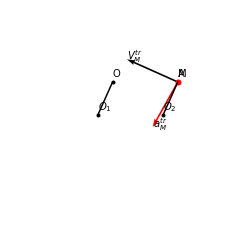

In [10]:
task1 = SimPlot([-50, 70], [-60, 60])
task1.ax.axis('off')

ln, = plt.plot([], [], 'b--')

def plot_semicircle(origin):
    xs = [R * np.cos(i) + origin[0] for i in np.linspace(0, np.pi, 120)]
    ys = [R * np.sin(i) + origin[1] for i in np.linspace(0, np.pi, 120)]

    xy = [[x, y] for x, y in zip(xs, ys)]

    poly = Polygon(xy, fill=False, hatch='///', color='black')

    return poly

def init_anim():
    return ln,

def update_anim(frame):
    task1.clear_plot()
    [O_frame, A_frame, O1_frame, O2_frame, M_frame] = [P.subs(t, frame).evalf() for P in [O, A, O1, O2, M]]
    [Vm_rel_frame, Vm_tr_frame] = [Vm_rel.subs(t, frame).evalf(), Vm_tr.subs(t, frame).evalf()]
    [Am_rel_frame, Am_tr_frame] = [P.subs(t, frame).evalf() for P in [Am_rel, Am_tr]]

    if frame > t_reach:
        Vm_rel_frame = Point2D(0, 0)
        Vm_tr_frame =  Vos.subs(t, frame).evalf()

        Am_rel_frame = Point2D(0, 0)
        Am_cor_frame = Point2D(0, 0)
        M_frame = A_frame

    task1.plot_points([O_frame, A_frame, O1_frame, O2_frame])
    task1.plot_points([M_frame], in_sizes=[5], in_colors=['red'])
    task1.plot_lines([[O2_frame, A_frame], [O1_frame, O_frame]])
    task1.plot_titles([O_frame, A_frame, O1_frame, O2_frame, M_frame], 
                        ['O', 'A', r'$O_1$', r'$O_2$', 'M'], ofx=0, ofy=3)

    if frame > t_reach:
        task1.plot_vectors([M_frame], [Vm_tr_frame], [r'$V_M^{tr}}$'], scale=6)
        task1.plot_vectors([M_frame], [Am_tr_frame], [r'$a_M^{tr}$'], scale=60, in_colors=['red'])
    else:
        # Velocity components
        task1.plot_vectors([M_frame] * 2, [Vm_tr_frame, Vm_rel_frame], [r'$\vec{V}_M^{tr}$', r'$\vec{V}_M^{rel}$'], scale=3)
        # Total velocity
        task1.plot_vectors([M_frame], [Vm_tr_frame + Vm_rel_frame], [r'$\vec{V}_M$'], scale=5, in_colors=['black'])
        # Acceleration components
        task1.plot_vectors([M_frame], [Am_tr_frame], [r'$\vec{a}_M^{tr}$'], scale=5, in_colors=['red'])
        task1.plot_vectors([M_frame], [Am_rel_frame], [r'$\vec{a}_M^{rel}$'], scale=12, in_colors=['blue'])
        # Total acceleration
        task1.plot_vectors([M_frame], [Am_tr_frame + Am_rel_frame], [r'$\vec{a}_M$'], scale=15, in_colors=['red'])

    task1.add_patch(plot_semicircle((O_frame + A_frame) / 2))

    return ln,
t_end = float(sp.solve(phi1_t - 4 * np.pi)[0])
frames = np.linspace(0, t_end, 300)

anim = FuncAnimation(task1.fig, update_anim, frames=frames, init_func=init_anim, blit=True)
anim.save('both1.gif', dpi=300, writer=PillowWriter(fps=60))
plt.close('all')

In [11]:

task1 = SimPlot([-50, 70], [-60, 60])
task1.ax.axis('off')

ln, = plt.plot([], [], 'b--')

def plot_semicircle(origin):
    xs = [R * np.cos(i) + origin[0] for i in np.linspace(0, np.pi, 120)]
    ys = [R * np.sin(i) + origin[1] for i in np.linspace(0, np.pi, 120)]

    xy = [[x, y] for x, y in zip(xs, ys)]

    poly = Polygon(xy, fill=False, hatch='///', color='black')

    return poly

def init_anim():
    return ln,

def update_anim(frame):
    task1.clear_plot()
    [O_frame, A_frame, O1_frame, O2_frame, M_frame] = [P.subs(t, frame).evalf() for P in [O, A, O1, O2, M]]
    [Vm_rel_frame, Vm_tr_frame] = [Vm_rel.subs(t, frame).evalf(), Vm_tr.subs(t, frame).evalf()]
    [Am_rel_frame, Am_tr_frame] = [P.subs(t, frame).evalf() for P in [Am_rel, Am_tr]]

    if frame > t_reach:
        Vm_rel_frame = Point2D(0, 0)
        Vm_tr_frame =  Vos.subs(t, frame).evalf()

        Am_rel_frame = Point2D(0, 0)
        Am_cor_frame = Point2D(0, 0)
        M_frame = A_frame

    task1.plot_points([O_frame, A_frame, O1_frame, O2_frame])
    task1.plot_points([M_frame], in_sizes=[5], in_colors=['red'])
    task1.plot_lines([[O2_frame, A_frame], [O1_frame, O_frame]])
    task1.plot_titles([O_frame, A_frame, O1_frame, O2_frame, M_frame], 
                        ['O', 'A', r'$O_1$', r'$O_2$', 'M'], ofx=0, ofy=3)

    if frame > t_reach:
        task1.plot_vectors([M_frame], [Vm_tr_frame], [r'$V_M^{tr}}$'], scale=6)
        task1.plot_vectors([M_frame], [Am_tr_frame], [r'$a_M^{tr}$'], scale=60, in_colors=['red'])
    else:
        # Velocity components
        task1.plot_vectors([M_frame] * 2, [Vm_tr_frame, Vm_rel_frame], [r'$\vec{V}_M^{tr}$', r'$\vec{V}_M^{rel}$'], scale=3)
        # Total velocity
        #task1.plot_vectors([M_frame], [Vm_tr_frame + Vm_rel_frame], [r'$\vec{V}_M$'], scale=5, in_colors=['black'])
        # Acceleration components
        task1.plot_vectors([M_frame], [Am_tr_frame], [r'$\vec{a}_M^{tr}$'], scale=5, in_colors=['red'])
        task1.plot_vectors([M_frame], [Am_rel_frame], [r'$\vec{a}_M^{rel}$'], scale=12, in_colors=['blue'])
        # Total acceleration
        #task1.plot_vectors([M_frame], [Am_tr_frame + Am_rel_frame], [r'$\vec{a}_M$'], scale=15, in_colors=['red'])

    task1.add_patch(plot_semicircle((O_frame + A_frame) / 2))

    return ln,
t_end = float(sp.solve(phi1_t - 4 * np.pi)[0])
frames = np.linspace(0, t_end, 300)

anim = FuncAnimation(task1.fig, update_anim, frames=frames, init_func=init_anim, blit=True)
anim.save('comp.gif', dpi=300, writer=PillowWriter(fps=60))
plt.close('all')

In [12]:
task1 = SimPlot([-50, 70], [-60, 60])
task1.ax.axis('off')

ln, = plt.plot([], [], 'b--')

def plot_semicircle(origin):
    xs = [R * np.cos(i) + origin[0] for i in np.linspace(0, np.pi, 120)]
    ys = [R * np.sin(i) + origin[1] for i in np.linspace(0, np.pi, 120)]

    xy = [[x, y] for x, y in zip(xs, ys)]

    poly = Polygon(xy, fill=False, hatch='///', color='black')

    return poly

def init_anim():
    return ln,

def update_anim(frame):
    task1.clear_plot()
    [O_frame, A_frame, O1_frame, O2_frame, M_frame] = [P.subs(t, frame).evalf() for P in [O, A, O1, O2, M]]
    [Vm_rel_frame, Vm_tr_frame] = [Vm_rel.subs(t, frame).evalf(), Vm_tr.subs(t, frame).evalf()]
    [Am_rel_frame, Am_tr_frame] = [P.subs(t, frame).evalf() for P in [Am_rel, Am_tr]]

    if frame > t_reach:
        Vm_rel_frame = Point2D(0, 0)
        Vm_tr_frame =  Vos.subs(t, frame).evalf()

        Am_rel_frame = Point2D(0, 0)
        Am_cor_frame = Point2D(0, 0)
        M_frame = A_frame

    task1.plot_points([O_frame, A_frame, O1_frame, O2_frame])
    task1.plot_points([M_frame], in_sizes=[5], in_colors=['red'])
    task1.plot_lines([[O2_frame, A_frame], [O1_frame, O_frame]])
    task1.plot_titles([O_frame, A_frame, O1_frame, O2_frame, M_frame], 
                        ['O', 'A', r'$O_1$', r'$O_2$', 'M'], ofx=0, ofy=3)

    if frame > t_reach:
        task1.plot_vectors([M_frame], [Vm_tr_frame], [r'$V_M^{tr}}$'], scale=6)
        task1.plot_vectors([M_frame], [Am_tr_frame], [r'$a_M^{tr}$'], scale=60, in_colors=['red'])
    else:
        # Velocity components
        #task1.plot_vectors([M_frame] * 2, [Vm_tr_frame, Vm_rel_frame], [r'$\vec{V}_M^{tr}$', r'$\vec{V}_M^{rel}$'], scale=3)
        # Total velocity
        task1.plot_vectors([M_frame], [Vm_tr_frame + Vm_rel_frame], [r'$\vec{V}_M$'], scale=5, in_colors=['black'])
        # Acceleration components
        #task1.plot_vectors([M_frame], [Am_tr_frame], [r'$\vec{a}_M^{tr}$'], scale=5, in_colors=['red'])
        #task1.plot_vectors([M_frame], [Am_rel_frame], [r'$\vec{a}_M^{rel}$'], scale=12, in_colors=['blue'])
        # Total acceleration
        task1.plot_vectors([M_frame], [Am_tr_frame + Am_rel_frame], [r'$\vec{a}_M$'], scale=15, in_colors=['red'])

    task1.add_patch(plot_semicircle((O_frame + A_frame) / 2))

    return ln,
t_end = float(sp.solve(phi1_t - 4 * np.pi)[0])
frames = np.linspace(0, t_end, 300)

anim = FuncAnimation(task1.fig, update_anim, frames=frames, init_func=init_anim, blit=True)
anim.save('total.gif', dpi=300, writer=PillowWriter(fps=60))
plt.close('all')

# Task 2

In [9]:
R = 30

In [10]:
t = Symbol('t')
sig2_t = 75 * np.pi * (0.1 *  t +  0.3 * t**2)
phi1_t = 2 * t - 0.3 * t**2
phi2_t = sig2_t / R

phi_O = phi1_t - np.pi / 2
phi_M = phi_O + phi2_t

In [11]:
O1 = Point2D(0, 0)
O2 = R * Point2D(sp.cos(phi1_t), sp.sin(phi1_t))
O = R * Point2D(sp.cos(phi_O), sp.sin(phi_O)) + O2
M = R * Point2D(sp.cos(phi_M), sp.sin(phi_M)) + O2

In [12]:
W1 = Point3D(0, 0, sp.diff(phi1_t))
W2 = Point3D(0, 0, sp.diff(phi2_t))
E1 = Point3D(0, 0, sp.diff(W1[2]))
E2 = Point3D(0, 0, sp.diff(W2[2]))

Mxy = M - O2
Vo2 = Point2D(sp.diff(O2[0]), sp.diff(O2[1]))
Vm_tr = Vo2 + Point2D(np.cross(W1, Point3D(Mxy[0], Mxy[1], 0)))
Vm_rel = Point2D(sp.diff(Mxy[0]), sp.diff(Mxy[1]))

Am_tr = Point2D(sp.diff(Vo2[0]), sp.diff(Vo2[1])) + Point2D(np.cross(E1, Mxy)[0:2]) + Point2D(np.cross(W1, np.cross(W1, Mxy))[0:2])
Am_rel = Point2D(sp.diff(sp.diff(Mxy[0])), sp.diff(sp.diff(Mxy[1])))
Am_cor = 2 * Point2D(np.cross(W1, Point3D(Vm_rel[0], Vm_rel[1], 0))[0:2])

In [13]:
task2 = SimPlot([-100, 100], [-100, 100])
task2.ax.axis('off')

ln, = plt.plot([], [], 'b--')

def init_anim():
    return ln,

def update_anim(frame):
    task2.clear_plot()
    [O1_frame, O2_frame, O_frame, M_frame] = [P.subs(t, frame).evalf() for P in [O1, O2, O, M]]
    [Vo2_frame, Vm_tr_frame, Vm_rel_frame] = [P.subs(t, frame).evalf() for P in [Vo2, Vm_tr, Vm_rel]]
    [Am_tr_frame, Am_rel_frame, Am_cor_frame] = [P.subs(t, frame).evalf() for P in [Am_tr, Am_rel, Am_cor]]

    task2.plot_points([O1_frame, O2_frame, O_frame])
    task2.plot_points([M_frame], in_sizes=[5], in_colors=['red'])
    task2.add_patch(Circle(O2_frame, R, fill=False))
    task2.plot_titles([O1_frame, O_frame, M_frame], [r'$O_1$', 'O', 'M'], ofx=3)

    # Velocity components
    task2.plot_vectors([M_frame], [Vm_rel_frame], [r'$\vec{V}_{O}^{rel}$'], scale=15)
    task2.plot_vectors([M_frame], [Vm_tr_frame], [r'$\vec{V}_M^{tr}$'], scale=2)
    # Total veclocity
    task2.plot_vectors([M_frame], [Vm_tr_frame + Vm_rel_frame], [r'$\vec{V}_M$'], scale=30, in_colors=['black'])
    # Acceleration components
    task2.plot_vectors([M_frame], [Am_tr_frame], [r'$\vec{a}_M^{tr}$'], scale=5, in_colors=['red'])
    task2.plot_vectors([M_frame], [Am_rel_frame], [r'$\vec{a}_M^{rel}$'], scale=300, in_colors=['blue'])
    task2.plot_vectors([M_frame], [Am_cor_frame], [r'$\vec{a}_M^{cor}$'], scale=30, in_colors=['green'])
    # Total acceleration
    task2.plot_vectors([M_frame], [Am_tr_frame + Am_rel_frame + Am_cor_frame], [r'$\vec{a}_M$'], scale=300, in_colors=['red'])
    return ln,

t_zero = float(sp.solve(phi1_t)[1])
frames = np.linspace(0, t_zero, 300)

anim = FuncAnimation(task2.fig, update_anim, frames=frames, init_func=init_anim, blit=True)
anim.save('both2.gif', dpi=300, writer=PillowWriter(fps=60))
plt.close('all')